In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Clona o repositório do GitHub
!git clone https://github.com/mariana-florencio/Treinamento-de-Redes-Neurais-com-Transfer-Learning

# Define o caminho para os dados
train_path = 'Treinamento-de-Redes-Neurais-com-Transfer-Learning'

# Verifica se o caminho existe
print(os.path.exists(train_path))  # Deve retornar True

# Carrega o modelo base (MobileNetV2) sem as camadas finais
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela as camadas do modelo base
base_model.trainable = False

# Adiciona camadas personalizadas
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 classes ('dogs' e 'cats')

# Cria o modelo final
model = Model(inputs=base_model.input, outputs=output)

# Compila o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepara os dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    validation_split=0.2
)

# Dados de treino
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', #0,1 | 1,0
    subset='training'
)

# Dados de validação
val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Treina o modelo
model.fit(train_data, validation_data=val_data, epochs=10)


fatal: destination path 'Treinamento-de-Redes-Neurais-com-Transfer-Learning' already exists and is not an empty directory.
True
Found 317 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 986ms/step - accuracy: 0.5936 - loss: 0.7971 - val_accuracy: 0.7215 - val_loss: 0.4727
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8263 - loss: 0.4067 - val_accuracy: 0.9494 - val_loss: 0.2279
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 393ms/step - accuracy: 0.9142 - loss: 0.2291 - val_accuracy: 0.9494 - val_loss: 0.1633
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9616 - loss: 0.1706 - val_accuracy: 0.9620 - val_loss: 0.1239
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.9562 - loss: 0.1348 - val_accuracy: 0.9873 - val_loss: 0.1021
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9661 - loss: 0.1229 - val_accuracy: 0.9747 - val_loss: 0.0915
Epoch 7/10
10/10 ━━━

Saving pantera.jpeg to pantera (1).jpeg
Arquivo "pantera (1).jpeg" carregado com sucesso!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


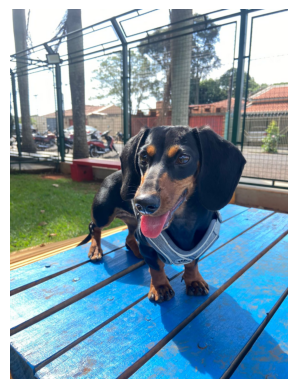

A imagem é de um CACHORRO.


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expande as dimensões para ficar compatível com o modelo
    img_array = img_array / 255.0  # Normaliza a imagem
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)  # Faz a previsão
    predicted_class = np.argmax(prediction, axis=1)  # Obtém o índice da classe predita

    # Exibe a imagem e a classe prevista
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    if predicted_class == 0:
        print("A imagem é de um GATO.")
    else:
        print("A imagem é de um CACHORRO.")

# Função para fazer o upload da imagem
def upload_image():
    uploaded = files.upload()  # Abre a caixa de upload de arquivos
    for filename in uploaded.keys():
        print(f'Arquivo "{filename}" carregado com sucesso!')
        return filename  # Retorna o nome do arquivo carregado

# Fazer upload da imagem
img_path = upload_image()

# Chama a função para prever a classe da imagem carregada
predict_image(img_path)
